In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

from ARGUS_Needle_Network import ARGUS_Needle_Network

In [2]:
img_dir = "../../Data_PNB/stephen_prep"
anno_dir = "../../Data_PNB/stephen_prep"

In [3]:
nnet_needle = ARGUS_Needle_Network(use_needle_settings=True)
nnet_needle.results_dirname = "Results-Needle-2022.08.15-Full"
nnet_needle.setup_vfold_files(img_dir, anno_dir)

6.528864338062704 gibibyte
0.01287497766315937 gibibyte
Num images / labels = 30 30
0 [[' 11'], [' 57']]
1 [[' 46'], [' 136']]
2 [[' 207'], [' 179']]
3 [[' 67'], [' 189']]
4 [[' 93'], [' 204']]
5 [[' 94'], [' 205']]
6 [[' 134'], [' 211'], [' 217']]
7 [[' 222A'], [' 238'], [' 39']]
8 [[' 153'], [' 240'], [' 230']]
9 [[' 193'], [' 54'], [' 191']]
20 7 3
22 6 2
23 5 2
24 4 2
23 4 3
23 5 2
22 5 3
19 5 6
17 9 4
17 10 3


In [4]:
vfn = 9

In [5]:
nnet_needle.setup_testing_vfold(vfold_num=vfn)
#nnet_needle.view_metric_curves(vfold_num=vfn,run_id=0)
#nnet_needle.view_testing_results_vfold(model_type="last", run_ids=[0,1], device_num=0)  
#needle_filenames,needle_test_images,needle_test_labelmaps,needle_labelmaps_predicted = nnet_needle.classify_vfold(model_type="best", run_ids=[0,1], device_num=0)

itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'


In [26]:
nnet_artery = ARGUS_Needle_Network(use_needle_settings=False)
nnet_artery.num_slices = 32
nnet_artery.results_dirname = "Results-Artery-2022.08.22-Partial"
nnet_artery.setup_vfold_files(img_dir, anno_dir)

6.528864338062704 gibibyte
0.01287497766315937 gibibyte
Num images / labels = 30 30
0 [[' 11'], [' 57']]
1 [[' 46'], [' 136']]
2 [[' 207'], [' 179']]
3 [[' 67'], [' 189']]
4 [[' 93'], [' 204']]
5 [[' 94'], [' 205']]
6 [[' 134'], [' 211'], [' 217']]
7 [[' 222A'], [' 238'], [' 39']]
8 [[' 153'], [' 240'], [' 230']]
9 [[' 193'], [' 54'], [' 191']]
20 7 3
22 6 2
23 5 2
24 4 2
23 4 3
23 5 2
22 5 3
19 5 6
17 9 4
17 10 3


In [27]:
#vfn = 0
#nnet_artery.setup_testing_vfold(vfold_num=vfn)
#nnet_artery.view_metric_curves(vfold_num=vfn,run_id=0)
#nnet_artery.view_testing_results_vfold(model_type="best", run_ids=[0,1], device_num=0)  
#artery_filenames,artery_test_images,artery_test_labelmaps,artery_labelmaps_predicted = nnet_artery.classify_vfold(model_type="best", run_ids=[0,1], device_num=0)

5. 191 AC_Video 5_cropM_prep.nii.gz


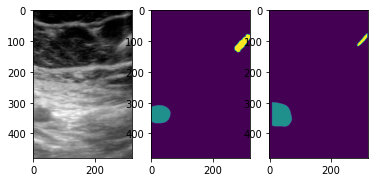

5. 54 AC_Video 3_cropM_prep.nii.gz


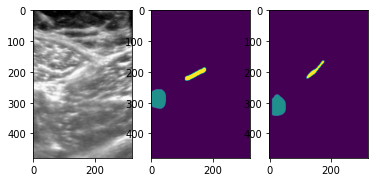

7. 193 AC Video 4_cropM_prep.nii.gz


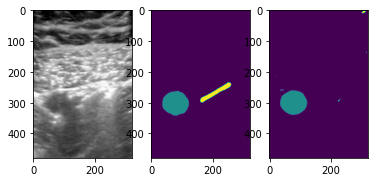

1. 57 AC_Video 1_cropM_prep.nii.gz


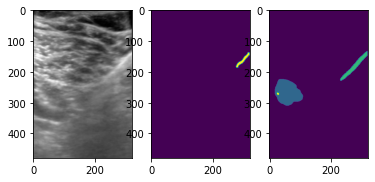

3. 11 AC_Video 2_cropM_prep.nii.gz


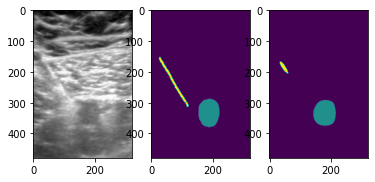

1. 136 AC_Video 1_cropM_prep.nii.gz


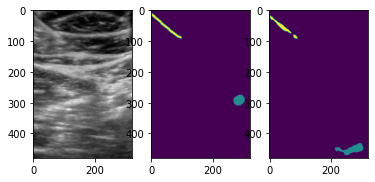

2. 46_Video 2_cropM_prep.nii.gz


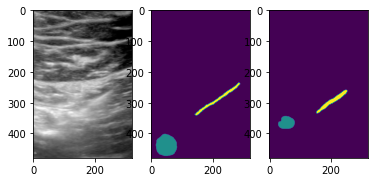

1. 204 AC Video 1_cropM_prep.nii.gz


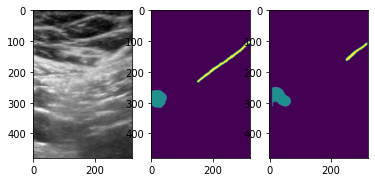

3. 93 AC_Video 2_cropM_prep.nii.gz


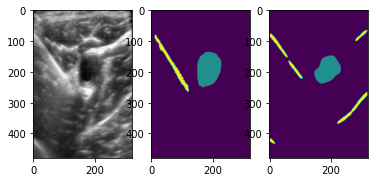

1. 205 AC_Video 1_cropM_prep.nii.gz


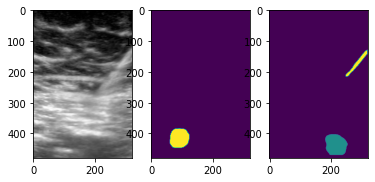

3. 205 AC_Video 2_cropM_prep.nii.gz


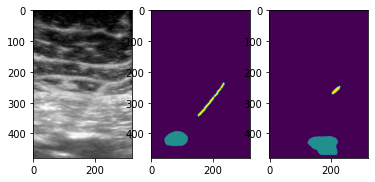

3. 94 AC_Video 2_cropM_prep.nii.gz


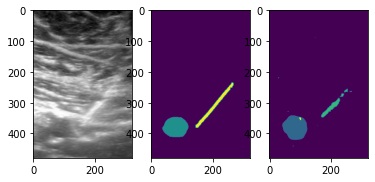

1. 134 AC_Video 1_cropM_prep.nii.gz


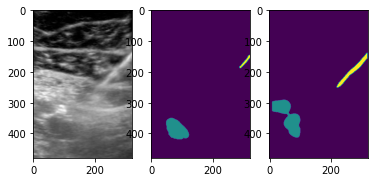

1. 211 AC_Video 1_cropM_prep.nii.gz


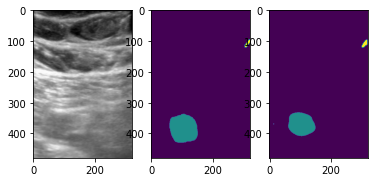

1. 217 AC_Video 1_cropM_prep.nii.gz


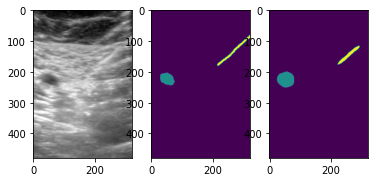

3. 134 AC_Video 2_cropM_prep.nii.gz


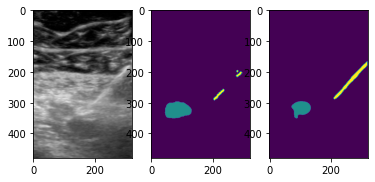

3. 217 AC_Video 2_cropM_prep.nii.gz


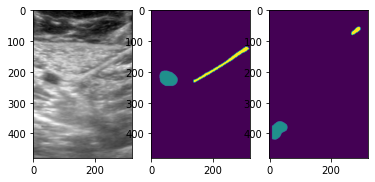

4. 211 AC_Video 3_cropM_prep.nii.gz


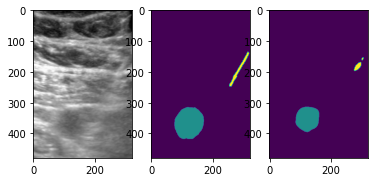

In [33]:
for vfn in [0,1,2,5,6,7]:
    nnet_needle.setup_testing_vfold(vfold_num=vfn)
    needle_filenames,needle_test_images,needle_test_labelmaps,needle_labelmaps_predicted = nnet_needle.classify_vfold(model_type="best", run_ids=[0,1], device_num=0)
    nnet_artery.setup_testing_vfold(vfold_num=vfn)
    artery_filenames,artery_test_images,artery_test_labelmaps,artery_labelmaps_predicted = nnet_artery.classify_vfold(model_type="best", run_ids=[0,1], device_num=0)
    for img_num in range(len(artery_labelmaps_predicted)):
        print(artery_filenames[img_num])
        plt.subplot(1,3,1)
        plt.imshow(rotate(needle_test_images[img_num][0],270),cmap="gray")
        plt.subplot(1,3,2)
        plt.imshow(rotate(needle_test_labelmaps[img_num][0]*2+artery_test_labelmaps[img_num][0],270))
        plt.subplot(1,3,3)
        plt.imshow(rotate(needle_labelmaps_predicted[img_num]*2+artery_labelmaps_predicted[img_num],270))
        plt.show()    

5. 54 AC_Video 3_cropM_prep.nii.gz


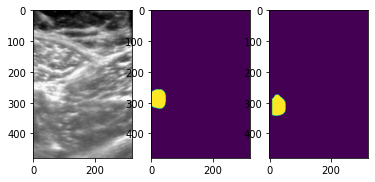

In [64]:
vfn=0
nnet_artery.setup_testing_vfold(vfold_num=vfn)
artery_filenames,artery_test_images,artery_test_labelmaps,artery_labelmaps_predicted = nnet_artery.classify_vfold(model_type="best", run_ids=[0,1], device_num=0)
nnet_needle.setup_testing_vfold(vfold_num=vfn)
needle_filenames,needle_test_images,needle_test_labelmaps,needle_labelmaps_predicted = nnet_needle.classify_vfold(model_type="best", run_ids=[0,1], device_num=0)
img_num = 1
print(artery_filenames[img_num])
plt.subplot(1,3,1)
plt.imshow(rotate(artery_test_images[img_num][0],270),cmap="gray")
plt.subplot(1,3,2)
plt.imshow(rotate(artery_test_labelmaps[img_num][0],270))
plt.subplot(1,3,3)
plt.imshow(rotate(artery_labelmaps_predicted[img_num],270))
plt.show()  

In [53]:
import itk
from itk import TubeTK as tube
import numpy as np
import time

In [72]:
img = itk.GetImageFromArray(artery_labelmaps_predicted[img_num].astype(np.float32))
filter = itk.DanielssonDistanceMapImageFilter.New(img)
start = time.perf_counter()
filter.Update()
end = time.perf_counter()
print(end-start)
img_dist = filter.GetOutput()
im = tube.ImageMath.New(img_dist)
im.Threshold(0,170,1,0)
img_thresh = im.GetOutput()
arr_thresh = itk.GetArrayFromImage(img_thresh)

0.04106649999812362


5. 54 AC_Video 3_cropM_prep.nii.gz


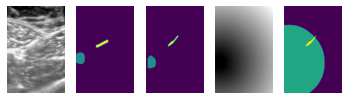

In [73]:
print(artery_filenames[img_num])
plt.subplot(1,5,1)
plt.axis(False)
plt.imshow(rotate(artery_test_images[img_num][0],270),cmap="gray")
plt.subplot(1,5,2)
plt.axis(False)
plt.imshow(rotate(needle_test_labelmaps[img_num][0]*2+artery_test_labelmaps[img_num][0],270))
plt.subplot(1,5,3)
plt.axis(False)
plt.imshow(rotate(needle_labelmaps_predicted[img_num]*2+artery_labelmaps_predicted[img_num],270))
plt.subplot(1,5,4)
plt.axis(False)
plt.imshow(rotate(img_dist,270),cmap="gray")
plt.subplot(1,5,5)
plt.axis(False)
plt.imshow(rotate(arr_thresh*3+needle_labelmaps_predicted[img_num]*2,270))
plt.show()